<a href="https://colab.research.google.com/github/annisakrnn/PCVK_Genap_2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Annisa Kurniawati

NIM: 2341720070

Kelas: TI/3H

No. Absen: 03

# Praktikum

Persiapan Untuk Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Praktikum 1 : Global Threshold

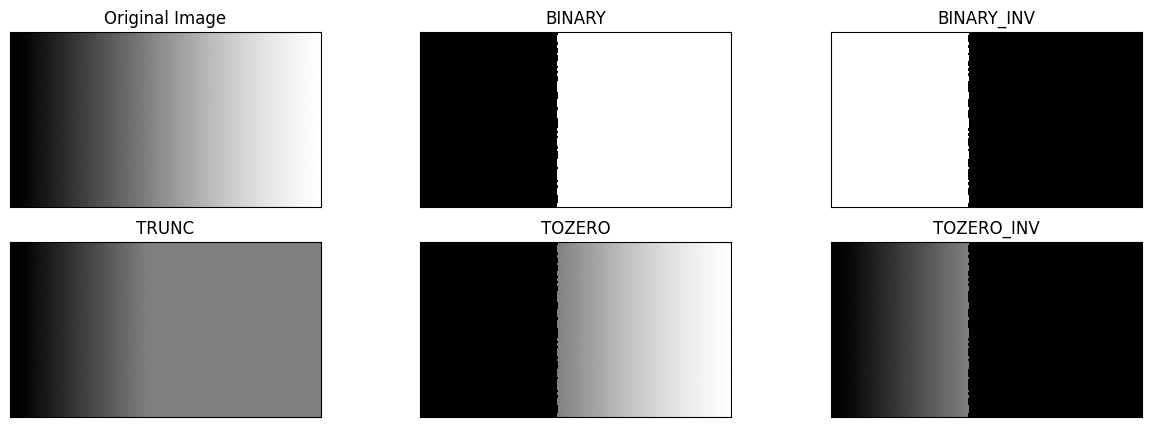

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/gradient.jpg')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


Praktikum 2 : Adptive Threshold

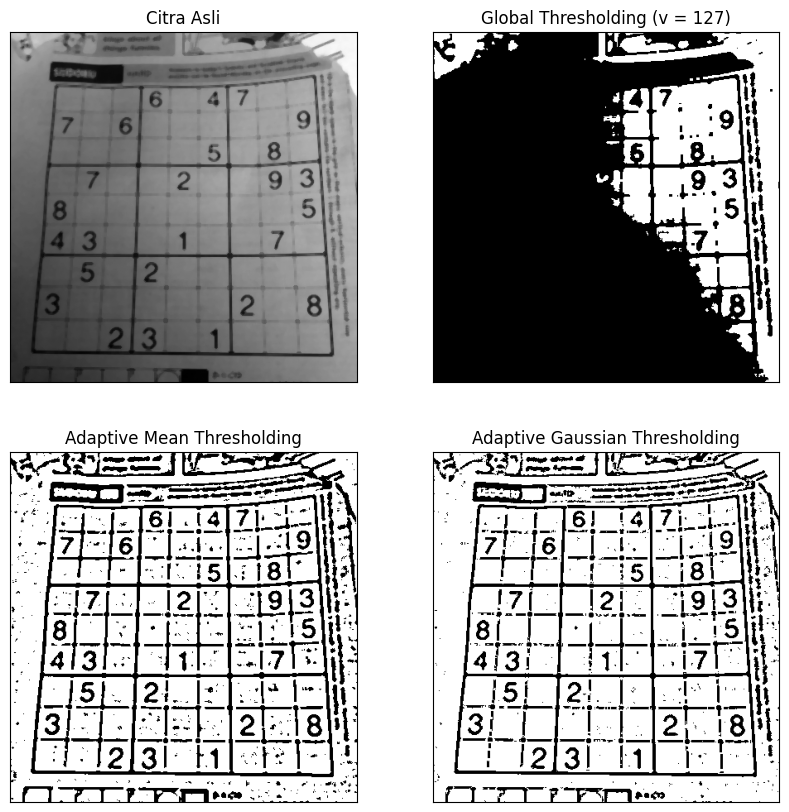

In [6]:
filename = ('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
 .THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
 , cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Praktikum 3 : Otsu's Threshold

/tmp/ipython-input-977064557.py:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])


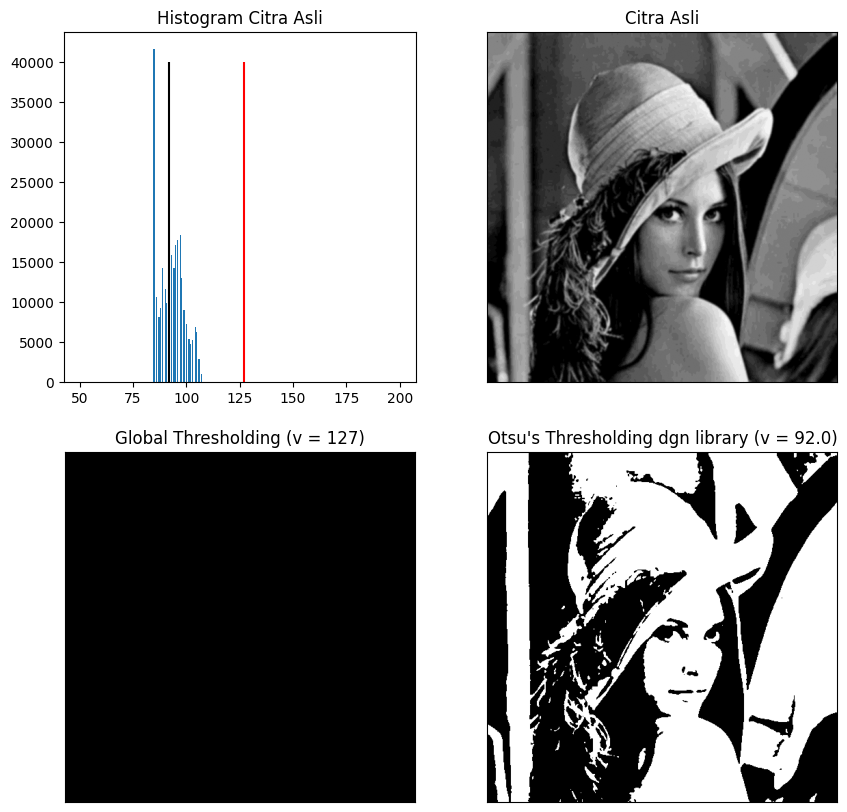

In [7]:
# Dengan Library
filename = ('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Praktikum 4 : Otsu;s Threshold tanpa gaussian filter dan menggunkan gaussian filter

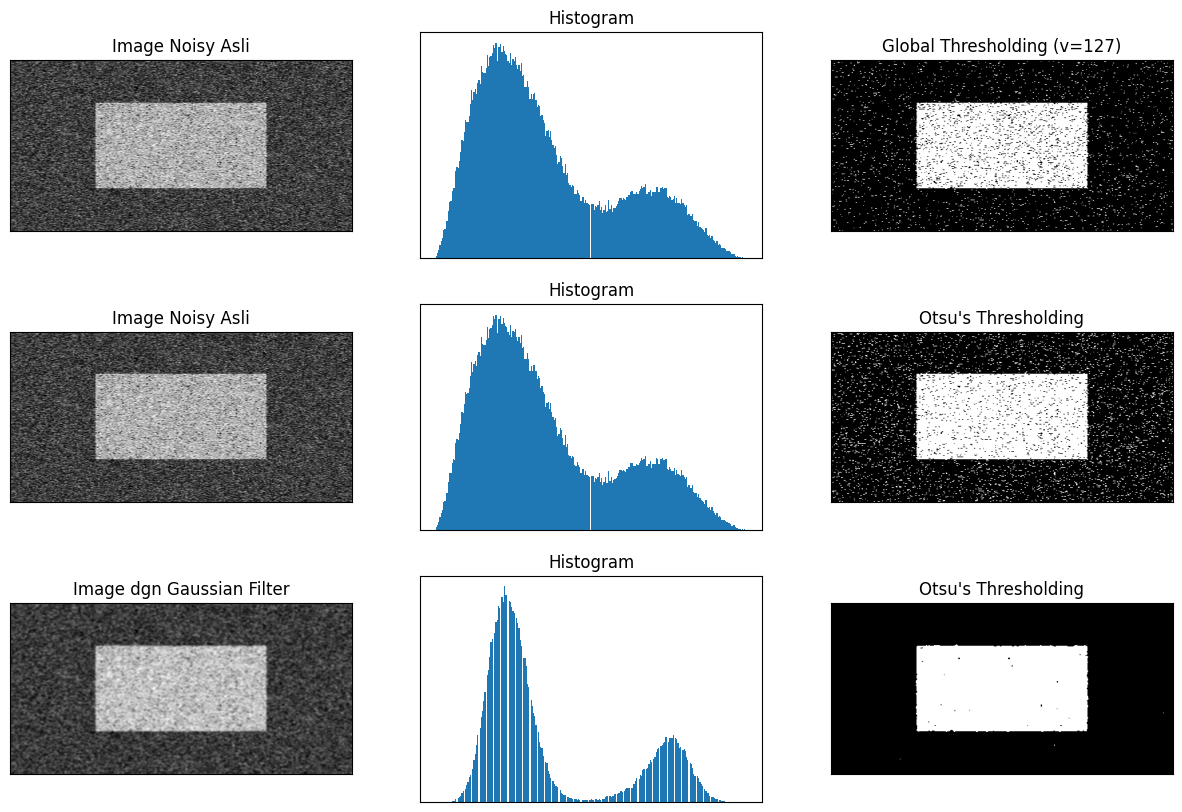

In [10]:
filename = ('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/noisy2.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Praktikum 5 : Segmentasi Citra menggunakan K-Means

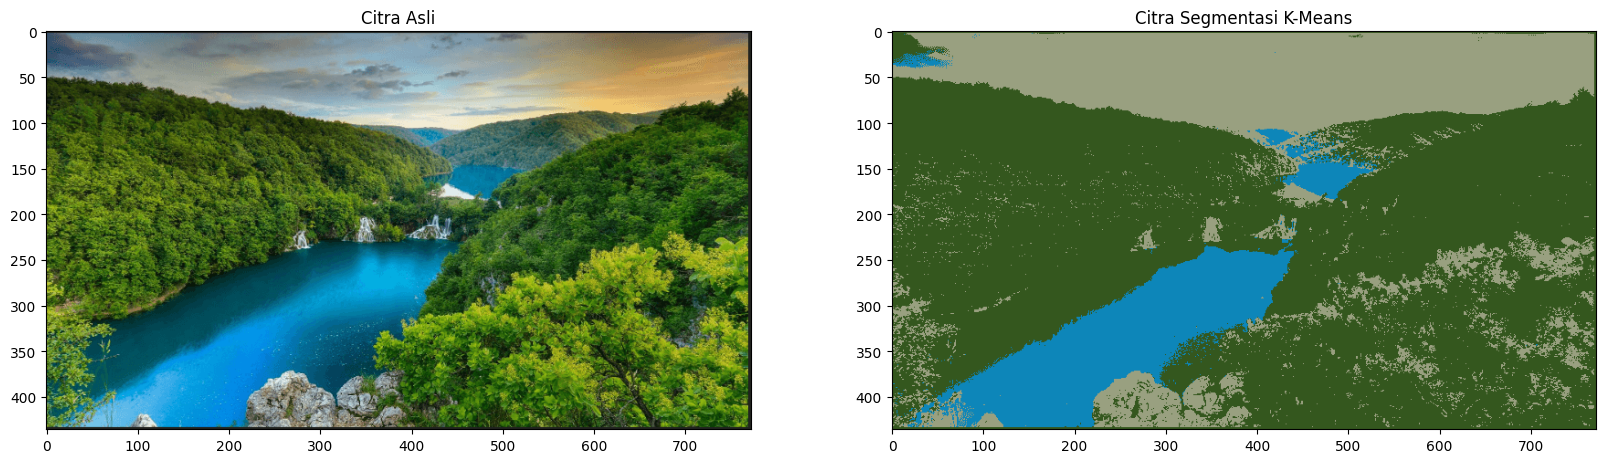

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Path file citra
filename = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/jungle.png'
img = cv.imread(filename)

# Memeriksa apakah citra berhasil dimuat
if img is None:
    raise FileNotFoundError(f"File {filename} tidak ditemukan atau tidak dapat dibaca.")

# Konversi warna dari BGR ke RGB untuk visualisasi yang benar
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan,
sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
# Reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# Convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dari KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara iterasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon (selisih antara posisi centroid sekarang dengan posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi titik centroid ke integer
centers = np.uint8(centers)
# Flattening label array
labels = labels.flatten()
# Konversi warna pixel asli ke warna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# Reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

# Membuat figure untuk visualisasi
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(1, 2, 2), plt.imshow(segmented_image)
plt.title('Citra Segmentasi K-Means')
plt.show()

Praktikum 6 : Segmentasi Citra menggunakan K-Means namun mengubah warna pada ckuster tertentu

(<Axes: >, <matplotlib.image.AxesImage at 0x7bcef0fcbf20>)

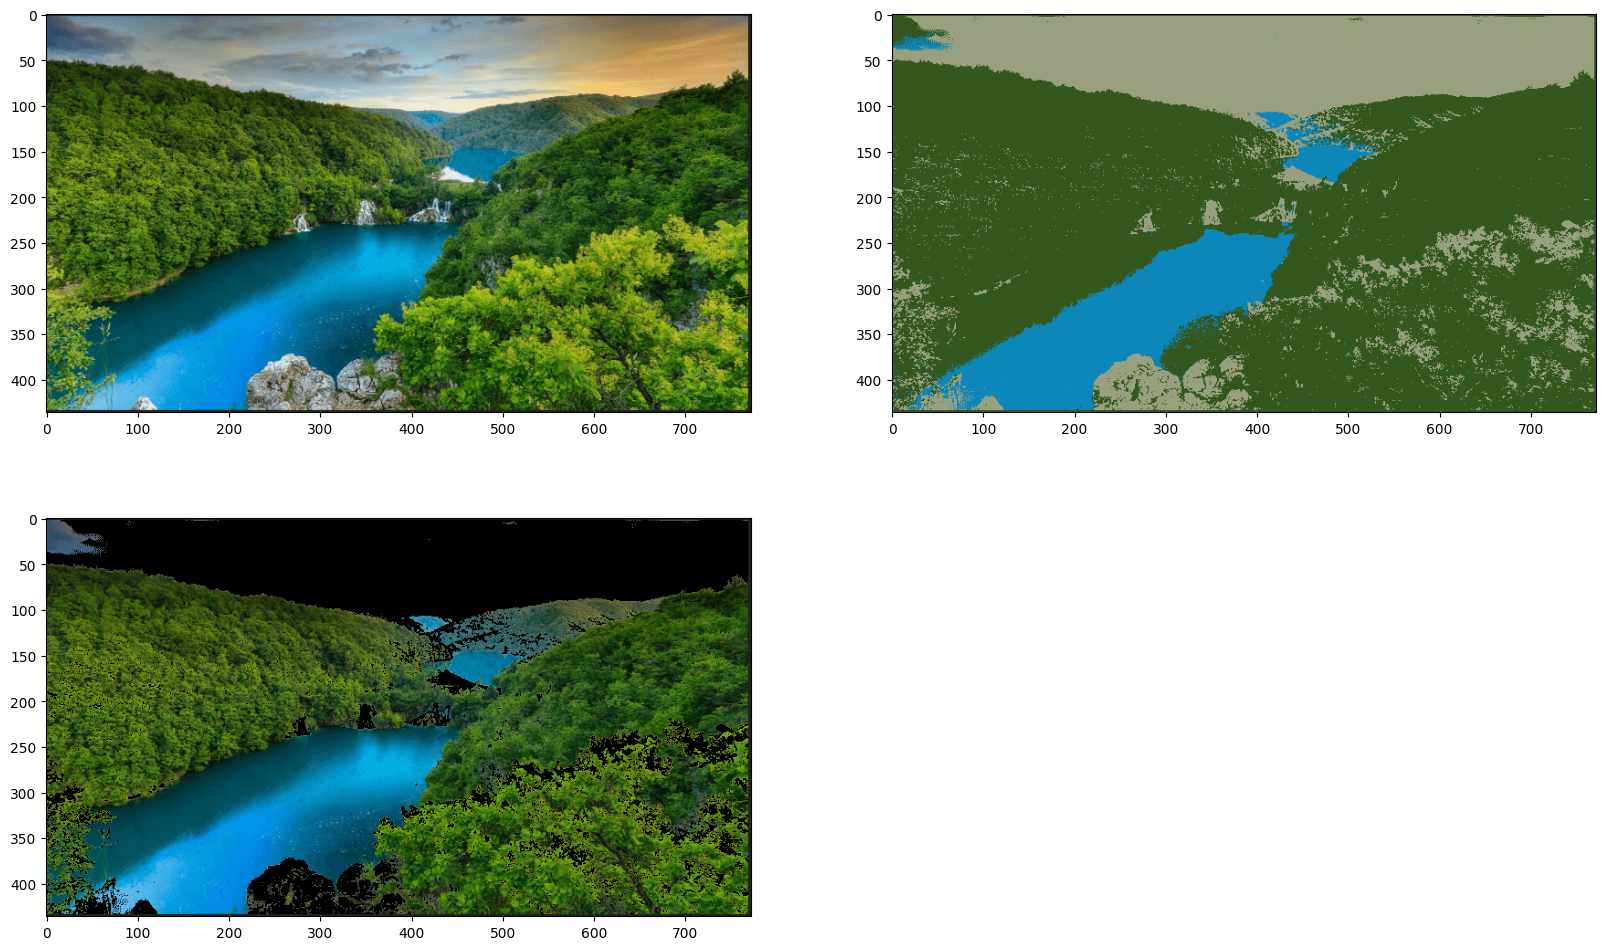

In [14]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# Tugas Praktikum

Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

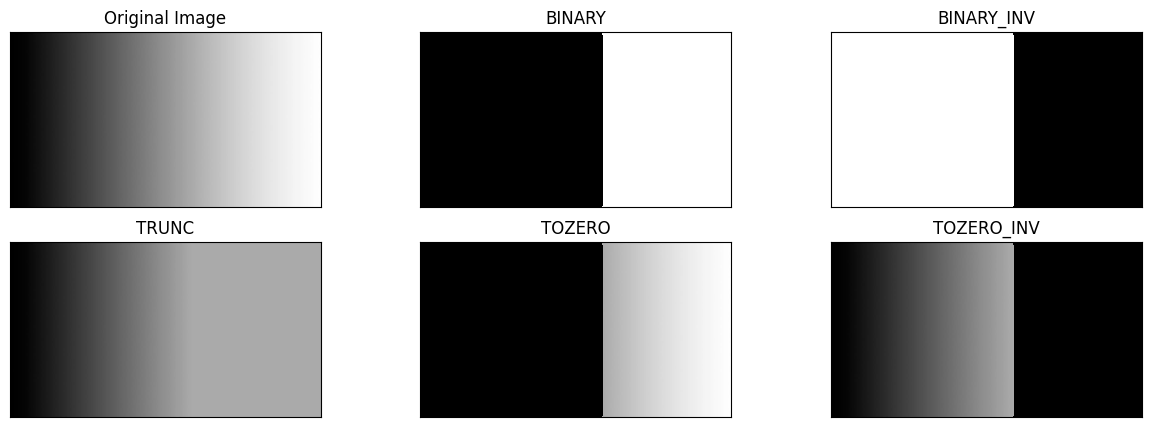

In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/gradient.jpg')
img = cv.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

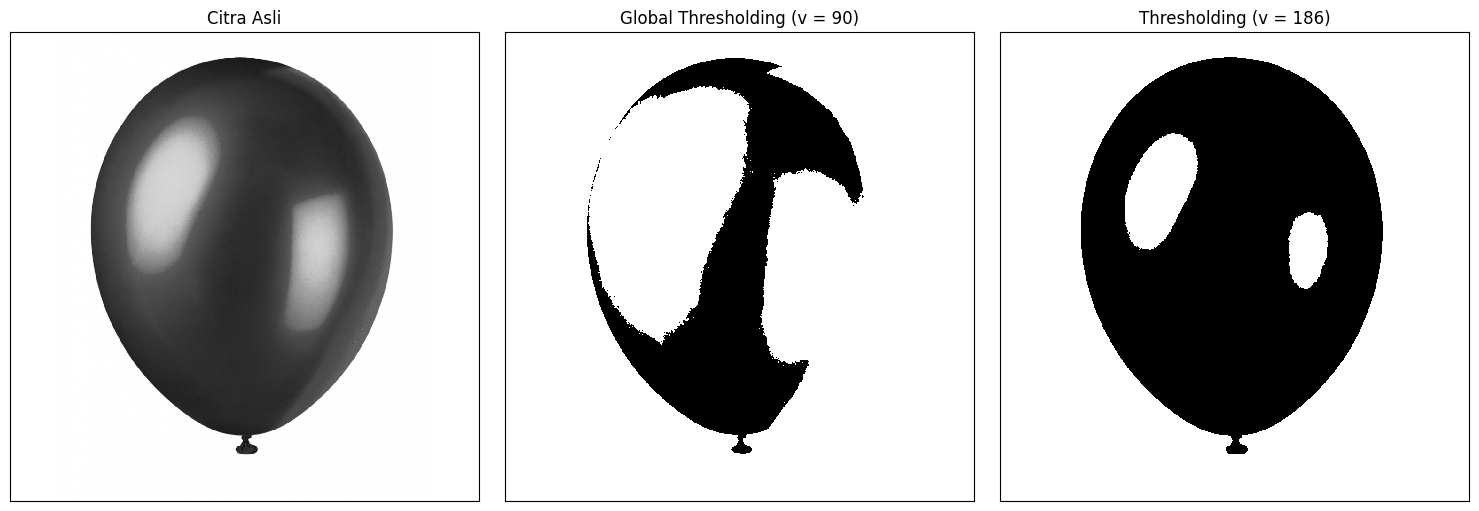

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Path file citra
filename = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/ballon.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Membaca citra dalam mode grayscale

# Terapkan Gaussian Blur untuk mengurangi noise sebelum thresholding
img_blur = cv.GaussianBlur(img, (5, 5), 0)

# Thresholding Global dengan nilai 90 untuk outline
thresh_global = 90
ret, thresh1 = cv.threshold(img_blur, thresh_global, 255, cv.THRESH_BINARY)

# Thresholding Global dengan nilai 186 untuk mencocokkan tampilan Otsu pada gambar
thresh_otsu_manual = 186
_, thresh2 = cv.threshold(img_blur, thresh_otsu_manual, 255, cv.THRESH_BINARY)

# Daftar judul dan citra untuk ditampilkan
titles = ['Citra Asli', f'Global Thresholding (v = {thresh_global})', f"Thresholding (v = {thresh_otsu_manual})"]
images = [img, thresh1, thresh2]

# Membuat figure untuk visualisasi
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

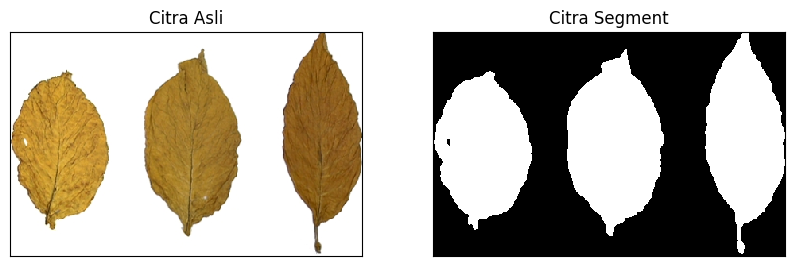

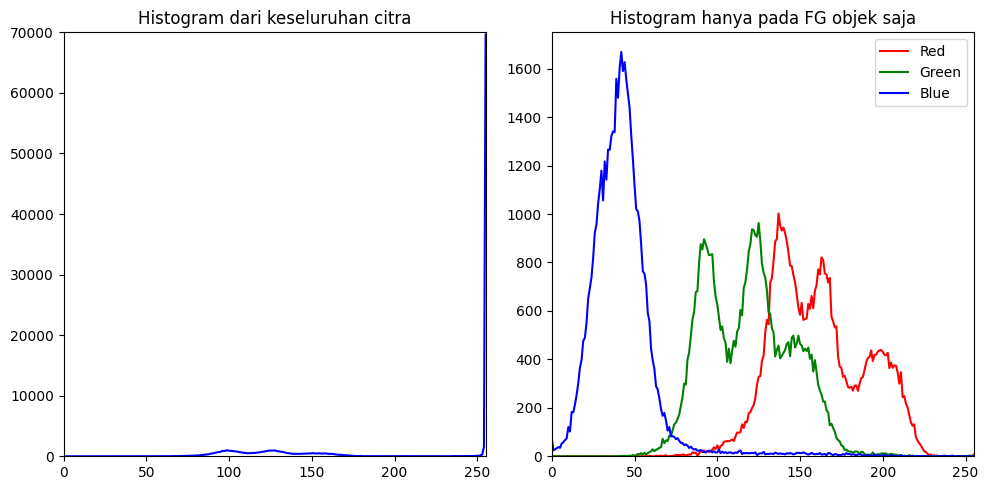

In [43]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Path file citra
filename = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/tobacco.png'
img = cv.imread(filename)  # Membaca citra dalam mode BGR

# Memeriksa apakah citra berhasil dimuat
if img is None:
    raise FileNotFoundError(f"File {filename} tidak ditemukan atau tidak dapat dibaca.")

# Konversi citra ke grayscale untuk pemrosesan
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Terapkan Gaussian Blur untuk mengurangi noise sebelum thresholding
img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)

# Thresholding Otsu untuk segmentasi (nilai dinamis)
ret2, thresh_segment = cv.threshold(img_blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Inversi thresholding agar daun menjadi putih (foreground) dan latar menjadi hitam
thresh_segment_inv = cv.bitwise_not(thresh_segment)

# Daftar judul dan citra untuk ditampilkan
titles = ['Citra Asli', 'Citra Segment']
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB), thresh_segment_inv]  # Konversi BGR ke RGB untuk tampilan Matplotlib

# Membuat figure untuk visualisasi citra
plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], cmap='gray' if i == 1 else None, interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Menghitung histogram keseluruhan citra (grayscale)
hist_full = cv.calcHist([img_gray], [0], None, [256], [0, 256])

# Menghitung histogram hanya pada foreground (daun) dengan mask dari segmentasi untuk setiap saluran
mask = thresh_segment_inv  # Gunakan mask inversi untuk foreground
hist_r = cv.calcHist([img], [2], mask, [256], [0, 256])  # Saluran Red (index 2 di BGR)
hist_g = cv.calcHist([img], [1], mask, [256], [0, 256])  # Saluran Green (index 1 di BGR)
hist_b = cv.calcHist([img], [0], mask, [256], [0, 256])  # Saluran Blue (index 0 di BGR)

# Membuat figure untuk visualisasi histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.plot(hist_full, color='blue')
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 255])
plt.ylim([0, 70000])  # Sesuaikan batas y berdasarkan puncak histogram

plt.subplot(1, 2, 2)
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')  # Tambahkan histogram biru
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 255])
plt.ylim([0, 1750])  # Sesuaikan batas y berdasarkan puncak histogram
plt.legend()

plt.tight_layout()
plt.show()

Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

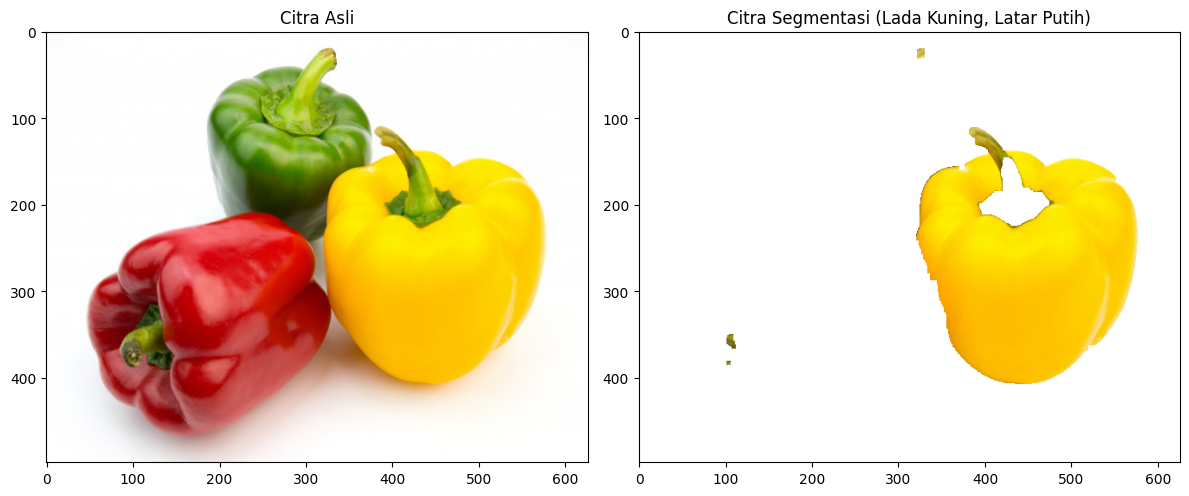

In [55]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Path file citra
filename = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/peppers.jpg'
img = cv.imread(filename)  # Membaca citra dalam mode BGR

# Pastikan citra berhasil dimuat
if img is None:
    raise FileNotFoundError(f"File {filename} tidak ditemukan atau tidak dapat dibaca.")

# Konversi citra dari BGR ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Rentang warna kuning (disesuaikan)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Buat mask untuk warna kuning
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Pembersihan mask
kernel = np.ones((5, 5), np.uint8)
mask_clean = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
mask_clean = cv.morphologyEx(mask_clean, cv.MORPH_CLOSE, kernel)

# Buat citra putih (background)
white_bg = np.full_like(img, 255)

# Gunakan mask sebagai penggabung (pakai operasi bitwise)
# bagian putih mask → ambil dari citra asli
# bagian hitam mask → ambil dari white_bg
result = cv.bitwise_and(img, img, mask=mask_clean)
mask_inv = cv.bitwise_not(mask_clean)
white_part = cv.bitwise_and(white_bg, white_bg, mask=mask_inv)
final = cv.add(result, white_part)

# Tampilkan hasil
titles = ['Citra Asli', 'Citra Segmentasi (Lada Kuning, Latar Putih)']
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB),
          cv.cvtColor(final, cv.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('on')
plt.tight_layout()
plt.show()


Kendala dalam menampilkan warna tertentu pada citra digital disebabkan oleh faktor pencahayaan, kemiripan spektrum warna, pantulan permukaan, dan keterbatasan model warna HSV itu sendiri. Oleh karena itu, dalam praktik segmentasi warna, diperlukan penyesuaian dinamis terhadap rentang HSV serta pra-pemrosesan citra seperti morphological filtering atau color calibration agar hasil segmentasi lebih akurat dan konsisten.

Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

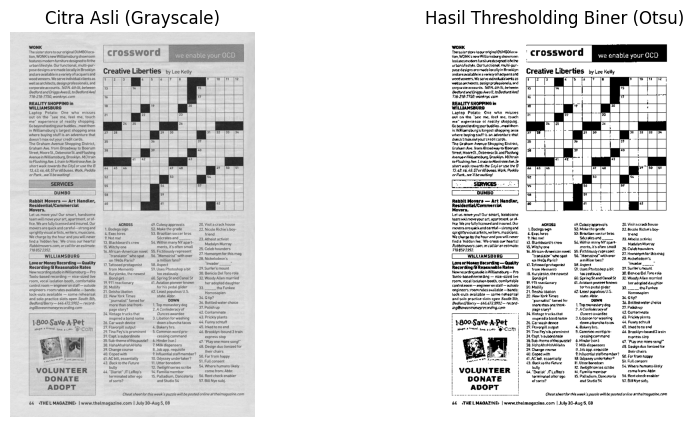

In [57]:
import cv2
import matplotlib.pyplot as plt

# 1. Membaca gambar berwarna
filename = '/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/crossword.jpg'
img = cv2.imread(filename)

# 2. Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Melakukan thresholding biner dengan metode Otsu
_, thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Menampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Citra Asli (Grayscale)')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Hasil Thresholding Biner (Otsu)')
plt.imshow(thresh_img, cmap='gray')
plt.axis('off')

plt.show()

Penjelasan:

Metode Otsu Thresholding merupakan salah satu teknik segmentasi citra yang secara otomatis menentukan nilai ambang (threshold) optimal dengan meminimalkan varians intra-kelas dan memaksimalkan varians antar-kelas dari histogram intensitas citra. Dengan kata lain, metode ini mencari titik pemisah terbaik antara dua kelompok piksel — piksel latar depan (foreground) dan latar belakang (background) — tanpa memerlukan penentuan nilai ambang secara manual.

Dalam konteks citra crossword, metode Otsu menjadi pilihan terbaik karena pola citra terdiri atas area hitam dan putih yang memiliki kontras tinggi dan distribusi intensitas yang jelas bimodal. Kondisi ini ideal bagi metode Otsu untuk bekerja secara optimal dalam memisahkan dua kelas piksel tersebut, sehingga menghasilkan hasil segmentasi yang bersih dan akurat.
